# 获取数据

In [2]:
import  configparser
config = configparser.ConfigParser()
config.read('../config.ini')
token = config.get('tushare', 'token')

import tushare as ts
ts.set_token(token)

In [3]:
origin_daily_300 = ts.pro_bar(ts_code='000300.SH', asset='I').sort_values('trade_date')
daily_300 = origin_daily_300.copy()
daily_300

,ts_code,trade_date,close,open,high,low,pre_close,change,pct_chg,vol,amount
4145,000300.SH,20050104,982.7940,994.7690,994.7690,980.6580,1000.0000,-17.2060,-1.7206,7.412869e+06,4.431977e+06
4144,000300.SH,20050105,992.5640,981.5770,997.3230,979.8770,982.7940,9.7700,0.9941,7.119109e+06,4.529208e+06
4143,000300.SH,20050106,983.1740,993.3310,993.7880,980.3300,992.5640,-9.3900,-0.9460,6.288029e+06,3.921015e+06
4142,000300.SH,20050107,983.9580,983.0450,995.7110,979.8120,983.1740,0.7840,0.0797,7.298694e+06,4.737469e+06
4141,000300.SH,20050110,993.8790,983.7600,993.9590,979.7890,983.9580,9.9210,1.0083,5.791698e+06,3.762933e+06
...,...,...,...,...,...,...,...,...,...,...,...
4,000300.SH,20220117,4767.2762,4728.7595,4775.2385,4726.7083,4726.7317,40.5445,0.8578,1.152957e+08,2.637882e+08
3,000300.SH,20220118,4813.3472,4766.7811,4826.3003,4747.9200,4767.2762,46.0710,0.9664,1.508708e+08,2.827494e+08
2,000300.SH,20220119,4780.3784,4815.8106,4828.7522,4755.9301,4813.3472,-32.9688,-0.6849,1.339274e+08,2.755346e+08
1,000300.SH,20220120,4823.5091,4778.2616,4845.0048,4777.5683,4780.3784,43.1307,0.9022,1.649713e+08,3.043443e+08


# 计算指标
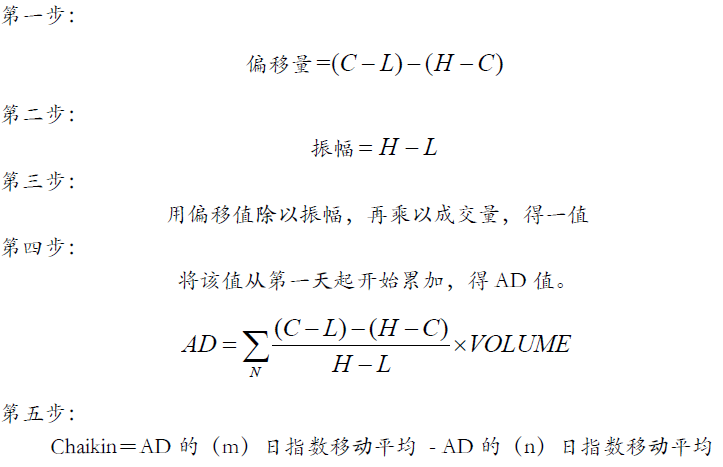

In [4]:
import pandas_ta as ta
import numpy as np
import pandas as pd

In [7]:
pd.DataFrame().ta.indicators()

Pandas TA - Technical Analysis Indicators - v0.3.14b0
Total Indicators & Utilities: 205
Abbreviations:
    aberration, above, above_value, accbands, ad, adosc, adx, alma, amat, ao, aobv, apo, aroon, atr, bbands, below, below_value, bias, bop, brar, cci, cdl_pattern, cdl_z, cfo, cg, chop, cksp, cmf, cmo, coppock, cross, cross_value, cti, decay, decreasing, dema, dm, donchian, dpo, ebsw, efi, ema, entropy, eom, er, eri, fisher, fwma, ha, hilo, hl2, hlc3, hma, hwc, hwma, ichimoku, increasing, inertia, jma, kama, kc, kdj, kst, kurtosis, kvo, linreg, log_return, long_run, macd, mad, massi, mcgd, median, mfi, midpoint, midprice, mom, natr, nvi, obv, ohlc4, pdist, percent_return, pgo, ppo, psar, psl, pvi, pvo, pvol, pvr, pvt, pwma, qqe, qstick, quantile, rma, roc, rsi, rsx, rvgi, rvi, short_run, sinwma, skew, slope, sma, smi, squeeze, squeeze_pro, ssf, stc, stdev, stoch, stochrsi, supertrend, swma, t3, td_seq, tema, thermo, tos_stdevall, trima, trix, true_range, tsi, tsignals, ttm_trend, ui, 

In [45]:
s.ewm()

4145     982.7940
4144     992.5640
4143     983.1740
4142     983.9580
4141     993.8790
          ...    
4       4767.2762
3       4813.3472
2       4780.3784
1       4823.5091
0       4779.3142
Name: close, Length: 4146, dtype: float64

In [46]:
def calc_chaikinAD(mkt_data, m=9, n=13, exp=True):
    high = mkt_data['high']
    low = mkt_data['low']
    close = mkt_data['close']
    volume = mkt_data['vol']
    
    AD = ta.ad(high, low, close, volume)
    if exp:
        chaikin = AD.ewm(span=m).mean() - AD.ewm(span=n, adjust=False).mean()
    else:
        chaikin = AD.rolling(m).mean() - AD.rolling(n).mean()
    mkt_data['AD'] = AD
    mkt_data['Chaikin'] = chaikin
    return mkt_data

In [36]:
daily_300 = calc_chaikinAD(daily_300, 9, 13)
daily_300[:20]

,ts_code,trade_date,close,open,high,low,pre_close,change,pct_chg,vol,amount,AD,Chaikin,signal,position
4145,000300.SH,20050104,982.794,994.769,994.769,980.658,1000.000,-17.206,-1.7206,7412868.94,4431977.418,-5.168678e+06,0.000000e+00,NaN,0.0
4144,000300.SH,20050105,992.564,981.577,997.323,979.877,982.794,9.770,0.9941,7119108.98,4529208.214,-1.933536e+06,2.522528e+04,NaN,0.0
4143,000300.SH,20050106,983.174,993.331,993.788,980.330,992.564,-9.390,-0.9460,6288029.05,3921015.420,-5.563940e+06,-6.231429e+03,NaN,0.0
4142,000300.SH,20050107,983.958,983.045,995.711,979.812,983.174,0.784,0.0797,7298694.09,4737469.399,-9.056057e+06,-6.394833e+04,NaN,0.0
4141,000300.SH,20050110,993.879,983.760,993.959,979.789,983.958,9.921,1.0083,5791697.99,3762932.890,-3.329756e+06,-1.797696e+04,NaN,0.0
4140,000300.SH,20050111,997.135,994.189,999.554,991.092,993.879,3.256,0.3276,5849079.98,3704076.709,-8.247848e+05,4.693697e+04,NaN,0.0
4139,000300.SH,20050112,996.748,996.651,996.976,989.257,997.135,-0.387,-0.0388,5014525.09,3093299.668,3.893507e+06,1.611976e+05,NaN,0.0
4138,000300.SH,20050113,996.877,996.078,999.473,992.695,996.748,0.129,0.0129,6044065.84,3842173.302,5.307772e+06,2.613960e+05,NaN,0.0
4137,000300.SH,20050114,988.306,996.617,1006.463,987.233,996.877,-8.571,-0.8598,7297842.38,4162921.211,-1.175657e+06,2.239477e+05,NaN,0.0
4136,000300.SH,20050117,967.452,979.111,981.525,965.078,988.306,-20.854,-2.1101,7288188.76,4249807.837,-6.359856e+06,1.057116e+05,NaN,0.0


# 计算信号

## 策略一
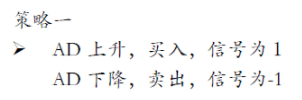

## 策略2
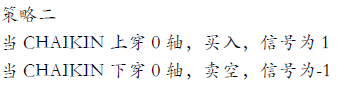

In [51]:
def calc_signal(mkt_data, strategy):
    AD = mkt_data['AD'] 
    Chaikin = mkt_data['Chaikin']
    """ 计算指标 """
    signals = []
    if strategy==1:
        for ad, ch, pre_ad, pre_ch in zip(AD, Chaikin, AD.shift(1), Chaikin.shift(1)):
            signal = None
            # AD 上升买入，AD下降卖出
            if ad>pre_ad:
                signal = 1
            elif ad<pre_ad:
                signal = -1
            signals.append(signal)
    elif strategy==2:
        for ad, ch, pre_ad, pre_ch in zip(AD, Chaikin, AD.shift(1), Chaikin.shift(1)):
            signal = None
            # Chaikin上穿0买入，Chaikin下穿0卖出
            if pre_ch<=0 and ch>0:
                signal = 1
            elif pre_ch>0 and ch<=0:
                signal = -1
            signals.append(signal)
    """ 指标赋值 """
    mkt_data['signal'] = signals
    return mkt_data

# 计算持仓

In [38]:
def calc_position(mkt_data):
    mkt_data['position'] = mkt_data['signal'].fillna(method='ffill').shift(1).fillna(0)
    return mkt_data

In [39]:
daily_300 = calc_position(daily_300)
daily_300

,ts_code,trade_date,close,open,high,low,pre_close,change,pct_chg,vol,amount,AD,Chaikin,signal,position
4145,000300.SH,20050104,982.7940,994.7690,994.7690,980.6580,1000.0000,-17.2060,-1.7206,7.412869e+06,4.431977e+06,-5.168678e+06,0.000000e+00,NaN,0.0
4144,000300.SH,20050105,992.5640,981.5770,997.3230,979.8770,982.7940,9.7700,0.9941,7.119109e+06,4.529208e+06,-1.933536e+06,2.522528e+04,NaN,0.0
4143,000300.SH,20050106,983.1740,993.3310,993.7880,980.3300,992.5640,-9.3900,-0.9460,6.288029e+06,3.921015e+06,-5.563940e+06,-6.231429e+03,NaN,0.0
4142,000300.SH,20050107,983.9580,983.0450,995.7110,979.8120,983.1740,0.7840,0.0797,7.298694e+06,4.737469e+06,-9.056057e+06,-6.394833e+04,NaN,0.0
4141,000300.SH,20050110,993.8790,983.7600,993.9590,979.7890,983.9580,9.9210,1.0083,5.791698e+06,3.762933e+06,-3.329756e+06,-1.797696e+04,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,000300.SH,20220117,4767.2762,4728.7595,4775.2385,4726.7083,4726.7317,40.5445,0.8578,1.152957e+08,2.637882e+08,5.471811e+10,-7.775300e+06,NaN,-1.0
3,000300.SH,20220118,4813.3472,4766.7811,4826.3003,4747.9200,4767.2762,46.0710,0.9664,1.508708e+08,2.827494e+08,5.481911e+10,-8.625270e+06,NaN,-1.0
2,000300.SH,20220119,4780.3784,4815.8106,4828.7522,4755.9301,4813.3472,-32.9688,-0.6849,1.339274e+08,2.755346e+08,5.477511e+10,-1.053118e+07,NaN,-1.0
1,000300.SH,20220120,4823.5091,4778.2616,4845.0048,4777.5683,4780.3784,43.1307,0.9022,1.649713e+08,3.043443e+08,5.483491e+10,-1.034016e+07,NaN,-1.0


# 计算结果

In [40]:
def statistic_performance(mkt_data, r0=0.03, data_period=1440):
    position = mkt_data['position']
    
    """      序列型特征 
        hold_r :      持仓收益
        hold_win :    持仓胜负
        hold_cumu_r : 累计持仓收益
        drawdown :    回撤
        ex_hold_r :   超额收益
    """
    hold_r = mkt_data['pct_chg']/100 * position
    hold_win = hold_r>0
    hold_cumu_r = (1+hold_r).cumprod() - 1
    drawdown = (hold_cumu_r.cummax()-hold_cumu_r)/(1+hold_cumu_r).cummax()    
    ex_hold_r= hold_r-r0/(250*1440/data_period)

    mkt_data['hold_r'] = hold_r
    mkt_data['hold_win'] = hold_win
    mkt_data['hold_cumu_r'] = hold_cumu_r
    mkt_data['drawdown'] = drawdown
    mkt_data['ex_hold_r'] = ex_hold_r
    
    """       数值型特征 
        v_hold_cumu_r：         累计持仓收益
        v_pos_hold_times：      多仓开仓次数
        v_pos_hold_win_times：  多仓开仓盈利次数
        v_pos_hold_period：     多仓持有周期数
        v_pos_hold_win_period： 多仓持有盈利周期数
        v_neg_hold_times：      空仓开仓次数
        v_neg_hold_win_times：  空仓开仓盈利次数
        v_neg_hold_period：     空仓持有盈利周期数
        v_neg_hold_win_period： 空仓开仓次数
        v_hold_period：         持仓周期数（最后一笔未平仓订单也算）
        v_hold_win_period：     持仓盈利周期数（最后一笔未平仓订单也算）
        v_max_dd：              最大回撤
        v_annual_std：          年化标准差
        v_annual_ret：          年化收益
        v_sharpe：              夏普率
    """
    v_hold_cumu_r = hold_cumu_r.tolist()[-1]

    v_pos_hold_times= 0 
    v_pos_hold_win_times = 0
    v_pos_hold_period = 0
    v_pos_hold_win_period = 0
    v_neg_hold_times= 0 
    v_neg_hold_win_times = 0
    v_neg_hold_period = 0
    v_neg_hold_win_period = 0
    for w, r, pre_pos, pos in zip(hold_win, hold_r, position.shift(1), position):
        # 有换仓（先结算上一次持仓，再初始化本次持仓）
        if pre_pos!=pos: 
            # 判断pre_pos非空：若为空则是循环的第一次，此时无需结算，直接初始化持仓即可
            if pre_pos == pre_pos:
                # 结算上一次持仓
                if pre_pos>0:
                    v_pos_hold_times += 1
                    v_pos_hold_period += tmp_hold_period
                    v_pos_hold_win_period += tmp_hold_win_period
                    if tmp_hold_r>0:
                        v_pos_hold_win_times+=1
                elif pre_pos<0:
                    v_neg_hold_times += 1      
                    v_neg_hold_period += tmp_hold_period
                    v_neg_hold_win_period += tmp_hold_win_period
                    if tmp_hold_r>0:                    
                        v_neg_hold_win_times+=1
            # 初始化本次持仓
            tmp_hold_r = r
            tmp_hold_period = 0
            tmp_hold_win_period = 0
        else: # 未换仓
            if abs(pos)>0:
                tmp_hold_period += 1
                if r>0:
                    tmp_hold_win_period += 1
                if abs(r)>0:
                    tmp_hold_r = (1+tmp_hold_r)*(1+r)-1       

    v_hold_period = (abs(position)>0).sum()
    v_hold_win_period = (hold_r>0).sum()
    v_max_dd = drawdown.max()    
    v_annual_ret = pow( 1+v_hold_cumu_r, 
                      1/(data_period/1440*len(mkt_data)/250) )-1
    v_annual_std = ex_hold_r.std() * np.sqrt(250*1440/data_period) 
    v_sharpe= v_annual_ret / v_annual_std

    """ 生成Performance DataFrame """
    performance_cols = ['累计收益', 
                        '多仓次数', '多仓胜率', '多仓平均持有期', 
                        '空仓次数', '空仓胜率', '空仓平均持有期', 
                        '日胜率', '最大回撤', '年化收益/最大回撤',
                        '年化收益', '年化标准差', '年化夏普'
                       ]
    performance_values = ['{:.2%}'.format(v_hold_cumu_r),
                          v_pos_hold_times, '{:.2%}'.format(v_pos_hold_win_times/v_pos_hold_times), 
                                            '{:.2f}'.format(v_pos_hold_period/v_pos_hold_times),
                          v_neg_hold_times, '{:.2%}'.format(v_neg_hold_win_times/v_neg_hold_times), 
                                            '{:.2f}'.format(v_neg_hold_period/v_neg_hold_times),
                          '{:.2%}'.format(v_hold_win_period/v_hold_period), 
                          '{:.2%}'.format(v_max_dd), 
                          '{:.2f}'.format(v_annual_ret/v_max_dd),
                          '{:.2%}'.format(v_annual_ret), 
                          '{:.2%}'.format(v_annual_std), 
                          '{:.2f}'.format(v_sharpe)
                         ]
    performance_df = pd.DataFrame(performance_values, index=performance_cols)
    return mkt_data, performance_df

# 可视化结果

In [41]:
import datetime
from bokeh.plotting import figure, show, output_notebook
from bokeh.layouts import column, row, gridplot, layout
from bokeh.models import Span
output_notebook()

Loading BokehJS ...

In [42]:
def visualize_performance(mkt_data):
    mkt_data['trade_datetime'] = mkt_data['trade_date'].apply(lambda x: datetime.datetime.strptime(x, '%Y%m%d'))
    dt = mkt_data['trade_datetime']

    f1 = figure(height=300, width=700, 
                sizing_mode='stretch_width', 
                title='Target Trend',
                x_axis_type='datetime',
                x_axis_label="trade_datetime", y_axis_label="close")
    f2 = figure(height=200, sizing_mode='stretch_width', 
                title='Position',
                x_axis_label="trade_datetime", y_axis_label="position",
                x_axis_type='datetime',
                x_range=f1.x_range)
    f3 = figure(height=200, sizing_mode='stretch_width', 
                title='Return',
                x_axis_type='datetime',
                x_range=f1.x_range)
    f4 = figure(height=200, sizing_mode='stretch_width', 
                title='Drawdown',
                x_axis_type='datetime',
                x_range=f1.x_range)


    # 绘制行情
    close = mkt_data['close']
    cumu_hold_close = (mkt_data['hold_cumu_r']+1)
    f1.line(dt, close/close.tolist()[0], line_width=1)
    f1.line(dt, cumu_hold_close, line_width=1, color='red')

    # 绘制指标
    indi = figure(height=200, sizing_mode='stretch_width', 
                  title='KDJ',
                  x_axis_type='datetime',
                  x_range=f1.x_range
                 )
    

    # 绘制仓位
    position = mkt_data['position']
    f2.step(dt, position)

    # 绘制收益
    hold_r = mkt_data['hold_r']
    f3.vbar(x=dt, top=hold_r)

    # 绘制回撤
    drawdown = mkt_data['drawdown']
    f4.line(dt, -drawdown, line_width=1)

    #p = column(f1,f2,f3,f4)
    p = gridplot([ [f1],
                   #[indi],
                   [f2], 
                   [f3],
                   [f4]
                 ])
    show(p)

# 整体执行

## 策略1（m=9, n=13）

In [52]:
daily_300 = calc_chaikinAD(daily_300, 9, 13)
daily_300 = calc_signal(daily_300, strategy=1)
daily_300 = calc_position(daily_300)
daily_300

,ts_code,trade_date,close,open,high,low,pre_close,change,pct_chg,vol,amount,AD,Chaikin,signal,position
4145,000300.SH,20050104,982.7940,994.7690,994.7690,980.6580,1000.0000,-17.2060,-1.7206,7.412869e+06,4.431977e+06,-5.168678e+06,0.000000e+00,NaN,0.0
4144,000300.SH,20050105,992.5640,981.5770,997.3230,979.8770,982.7940,9.7700,0.9941,7.119109e+06,4.529208e+06,-1.933536e+06,1.335138e+06,1.0,0.0
4143,000300.SH,20050106,983.1740,993.3310,993.7880,980.3300,992.5640,-9.3900,-0.9460,6.288029e+06,3.921015e+06,-5.563940e+06,5.590359e+05,-1.0,1.0
4142,000300.SH,20050107,983.9580,983.0450,995.7110,979.8120,983.1740,0.7840,0.0797,7.298694e+06,4.737469e+06,-9.056057e+06,-4.584032e+05,-1.0,-1.0
4141,000300.SH,20050110,993.8790,983.7600,993.9590,979.7890,983.9580,9.9210,1.0083,5.791698e+06,3.762933e+06,-3.329756e+06,3.145260e+03,1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,000300.SH,20220117,4767.2762,4728.7595,4775.2385,4726.7083,4726.7317,40.5445,0.8578,1.152957e+08,2.637882e+08,5.471811e+10,-3.260938e+07,1.0,-1.0
3,000300.SH,20220118,4813.3472,4766.7811,4826.3003,4747.9200,4767.2762,46.0710,0.9664,1.508708e+08,2.827494e+08,5.481911e+10,-2.739270e+07,1.0,1.0
2,000300.SH,20220119,4780.3784,4815.8106,4828.7522,4755.9301,4813.3472,-32.9688,-0.6849,1.339274e+08,2.755346e+08,5.477511e+10,-2.554728e+07,-1.0,1.0
1,000300.SH,20220120,4823.5091,4778.2616,4845.0048,4777.5683,4780.3784,43.1307,0.9022,1.649713e+08,3.043443e+08,5.483491e+10,-2.013474e+07,1.0,-1.0


In [54]:
# 评价和展现
#result_daily_300, performance_df = statistic_performance(daily_300)
#result_daily_300, performance_df = statistic_performance(daily_300[daily_300['trade_date'].apply(lambda x: x>='20050901' and x<='20120315')])
result_daily_300, performance_df = statistic_performance(daily_300[daily_300['trade_date'].apply(lambda x: x>='20120315')])

visualize_performance(result_daily_300)
print(performance_df)

<ipython-input-40-429b162b44bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mkt_data['hold_r'] = hold_r
<ipython-input-40-429b162b44bd>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mkt_data['hold_win'] = hold_win
<ipython-input-40-429b162b44bd>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

                 0
累计收益       -68.55%
多仓次数           649
多仓胜率        41.91%
多仓平均持有期       1.01
空仓次数           650
空仓胜率        36.31%
空仓平均持有期       0.68
日胜率         47.48%
最大回撤        79.71%
年化收益/最大回撤    -0.14
年化收益       -11.36%
年化标准差       22.51%
年化夏普         -0.50


## 策略2（m=9, n=13）

In [55]:
daily_300 = calc_chaikinAD(daily_300, 9, 13)
daily_300 = calc_signal(daily_300, strategy=2)
daily_300 = calc_position(daily_300)
daily_300

,ts_code,trade_date,close,open,high,low,pre_close,change,pct_chg,vol,amount,AD,Chaikin,signal,position
4145,000300.SH,20050104,982.7940,994.7690,994.7690,980.6580,1000.0000,-17.2060,-1.7206,7.412869e+06,4.431977e+06,-5.168678e+06,0.000000e+00,NaN,0.0
4144,000300.SH,20050105,992.5640,981.5770,997.3230,979.8770,982.7940,9.7700,0.9941,7.119109e+06,4.529208e+06,-1.933536e+06,1.335138e+06,1.0,0.0
4143,000300.SH,20050106,983.1740,993.3310,993.7880,980.3300,992.5640,-9.3900,-0.9460,6.288029e+06,3.921015e+06,-5.563940e+06,5.590359e+05,NaN,1.0
4142,000300.SH,20050107,983.9580,983.0450,995.7110,979.8120,983.1740,0.7840,0.0797,7.298694e+06,4.737469e+06,-9.056057e+06,-4.584032e+05,-1.0,1.0
4141,000300.SH,20050110,993.8790,983.7600,993.9590,979.7890,983.9580,9.9210,1.0083,5.791698e+06,3.762933e+06,-3.329756e+06,3.145260e+03,1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,000300.SH,20220117,4767.2762,4728.7595,4775.2385,4726.7083,4726.7317,40.5445,0.8578,1.152957e+08,2.637882e+08,5.471811e+10,-3.260938e+07,NaN,-1.0
3,000300.SH,20220118,4813.3472,4766.7811,4826.3003,4747.9200,4767.2762,46.0710,0.9664,1.508708e+08,2.827494e+08,5.481911e+10,-2.739270e+07,NaN,-1.0
2,000300.SH,20220119,4780.3784,4815.8106,4828.7522,4755.9301,4813.3472,-32.9688,-0.6849,1.339274e+08,2.755346e+08,5.477511e+10,-2.554728e+07,NaN,-1.0
1,000300.SH,20220120,4823.5091,4778.2616,4845.0048,4777.5683,4780.3784,43.1307,0.9022,1.649713e+08,3.043443e+08,5.483491e+10,-2.013474e+07,NaN,-1.0


In [57]:
# 评价和展现
#result_daily_300, performance_df = statistic_performance(daily_300)
#result_daily_300, performance_df = statistic_performance(daily_300[daily_300['trade_date'].apply(lambda x: x>='20050901' and x<='20120315')])
result_daily_300, performance_df = statistic_performance(daily_300[daily_300['trade_date'].apply(lambda x: x>='20120315')])

visualize_performance(result_daily_300)
print(performance_df)

<ipython-input-40-429b162b44bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mkt_data['hold_r'] = hold_r
<ipython-input-40-429b162b44bd>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mkt_data['hold_win'] = hold_win
<ipython-input-40-429b162b44bd>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

                 0
累计收益       -26.16%
多仓次数            56
多仓胜率        26.79%
多仓平均持有期      31.39
空仓次数            55
空仓胜率        25.45%
空仓平均持有期       9.44
日胜率         51.10%
最大回撤        58.50%
年化收益/最大回撤    -0.05
年化收益        -3.11%
年化标准差       22.52%
年化夏普         -0.14


# 策略优化（策略2改进，m=14, n=16）
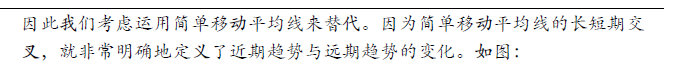

In [58]:
daily_300 = calc_chaikinAD(daily_300, 14, 16, False)
daily_300 = calc_signal(daily_300, strategy=2)
daily_300 = calc_position(daily_300)
daily_300

,ts_code,trade_date,close,open,high,low,pre_close,change,pct_chg,vol,amount,AD,Chaikin,signal,position
4145,000300.SH,20050104,982.7940,994.7690,994.7690,980.6580,1000.0000,-17.2060,-1.7206,7.412869e+06,4.431977e+06,-5.168678e+06,NaN,NaN,0.0
4144,000300.SH,20050105,992.5640,981.5770,997.3230,979.8770,982.7940,9.7700,0.9941,7.119109e+06,4.529208e+06,-1.933536e+06,NaN,NaN,0.0
4143,000300.SH,20050106,983.1740,993.3310,993.7880,980.3300,992.5640,-9.3900,-0.9460,6.288029e+06,3.921015e+06,-5.563940e+06,NaN,NaN,0.0
4142,000300.SH,20050107,983.9580,983.0450,995.7110,979.8120,983.1740,0.7840,0.0797,7.298694e+06,4.737469e+06,-9.056057e+06,NaN,NaN,0.0
4141,000300.SH,20050110,993.8790,983.7600,993.9590,979.7890,983.9580,9.9210,1.0083,5.791698e+06,3.762933e+06,-3.329756e+06,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,000300.SH,20220117,4767.2762,4728.7595,4775.2385,4726.7083,4726.7317,40.5445,0.8578,1.152957e+08,2.637882e+08,5.471811e+10,-6.552224e+06,NaN,-1.0
3,000300.SH,20220118,4813.3472,4766.7811,4826.3003,4747.9200,4767.2762,46.0710,0.9664,1.508708e+08,2.827494e+08,5.481911e+10,-1.656069e+07,NaN,-1.0
2,000300.SH,20220119,4780.3784,4815.8106,4828.7522,4755.9301,4813.3472,-32.9688,-0.6849,1.339274e+08,2.755346e+08,5.477511e+10,-1.803114e+07,NaN,-1.0
1,000300.SH,20220120,4823.5091,4778.2616,4845.0048,4777.5683,4780.3784,43.1307,0.9022,1.649713e+08,3.043443e+08,5.483491e+10,-1.536878e+07,NaN,-1.0


In [60]:
# 评价和展现
#result_daily_300, performance_df = statistic_performance(daily_300)
#result_daily_300, performance_df = statistic_performance(daily_300[daily_300['trade_date'].apply(lambda x: x>='20050901' and x<='20120315')])
result_daily_300, performance_df = statistic_performance(daily_300[daily_300['trade_date'].apply(lambda x: x>='20120315')])

visualize_performance(result_daily_300)
print(performance_df)

<ipython-input-40-429b162b44bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mkt_data['hold_r'] = hold_r
<ipython-input-40-429b162b44bd>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mkt_data['hold_win'] = hold_win
<ipython-input-40-429b162b44bd>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

                 0
累计收益       -25.90%
多仓次数           116
多仓胜率        49.14%
多仓平均持有期      13.47
空仓次数           116
空仓胜率        46.55%
空仓平均持有期       5.16
日胜率         50.81%
最大回撤        79.07%
年化收益/最大回撤    -0.04
年化收益        -3.08%
年化标准差       22.52%
年化夏普         -0.14


# 参数稳定性（仅对优化策略2）

In [75]:
def get_rolling_best_P(mkt_data, default_p, alternative_ps, choice_period):
    """ 生成一个dict，存放所有参数下生成的mkt_data """
    alternative_dict = {}
    for p in alternative_ps:
        params = [int(v) for v in p.split('_')]
        mkt_data = calc_chaikinAD(mkt_data, params[0], params[1], exp=False)
        mkt_data = calc_signal(mkt_data, strategy=2)
        mkt_data = calc_position(mkt_data)
        mkt_data['hold_r'] = mkt_data['position'] * mkt_data['pct_chg']/100
        mkt_data['cumu_hold_nv'] = (1+mkt_data['hold_r']).cumprod()
        alternative_dict[p] = mkt_data.copy()
        
    """ 从choice_period + default_n开始，选择前choice_period期表现最好的策略的signal """
    cumu_hold_nv_df = pd.concat([alternative_dict[p][['cumu_hold_nv']] for p in alternative_ps], 
                                 axis=1)
    cumu_hold_nv_df.columns=alternative_ps
    position_df = pd.concat([alternative_dict[p][['position']] for p in alternative_ps], 
                             axis=1)
    position_df.columns=alternative_ps
    
    best_Ps = [default_p] * len(mkt_data)
    best_positions = position_df[default_p].tolist()
    for idx in range(len(mkt_data)-choice_period-1):
        """取 idx - idx+choice_period 共 choice_period条数据"""
        tmp_cumu_hold_nv_df = cumu_hold_nv_df[idx:idx+choice_period]
        """比较不同n下的 hold_cumu_r/max_dd 的值"""
        tmp_comp_res = pd.DataFrame([[tmp_cumu_hold_nv_df[p].values[-1]/tmp_cumu_hold_nv_df[p].values[0]-1 for p in alternative_ps],
                                     [(1-tmp_cumu_hold_nv_df[p]/tmp_cumu_hold_nv_df[p].cummax()).max() for p in alternative_ps]
                                    ],
                                     columns=alternative_ps, 
                                     index=['hold_cumu_r', 'max_dd']).T
        tmp_comp_res['value'] = tmp_comp_res['hold_cumu_r']/tmp_comp_res['max_dd']
        """选取hold_cumu_r/max_dd最大的参数作为当期best_N，并将其下期的position作为下期的best_pos"""
        best_P = tmp_comp_res.sort_values(by='value', ascending=False).index[0]
        best_pos = position_df[best_P][idx+choice_period]
        best_Ps[idx+choice_period-1] = best_P
        best_positions[idx+choice_period] = best_pos
    best_Ps = pd.Series(best_Ps, index=mkt_data['trade_date']) 
    best_positions = pd.Series(best_positions, index=mkt_data['trade_date']) 
    return best_Ps, best_positions

In [79]:
default_p = '14_16'
alternative_ps = []
for M in range(9, 17, 1):
    for N in range(M+1, 23, 1):
        alternative_ps.append('{}_{}'.format(M, N))
choice_period = 250

best_Ps, best_positions = get_rolling_best_P( daily_300, 
                                              default_p=default_p, 
                                              alternative_ps=alternative_ps, 
                                              choice_period=choice_period)
print(best_Ps[choice_period:].value_counts())
daily_300['position'] = best_positions.values

9_10     692
14_16    552
13_17    320
9_11     279
13_20    217
13_14    214
16_19    187
15_16    134
14_17    128
16_17    110
15_18    102
14_15    101
11_15     79
13_16     59
15_17     58
9_12      54
11_17     52
10_11     50
15_20     49
9_13      47
13_22     41
12_13     36
9_14      35
9_15      34
11_18     30
12_19     29
10_12     28
16_20     25
12_14     17
13_18     17
13_19     15
10_13     14
9_19      13
11_12     12
13_21     11
10_18     10
14_18      8
12_17      8
10_14      7
10_17      6
15_22      5
10_15      3
11_14      3
12_16      2
10_21      1
12_21      1
9_22       1
dtype: int64


In [81]:
#result_daily_300, performance_df = statistic_performance(daily_300)
result_daily_300, performance_df = statistic_performance(daily_300[daily_300['trade_date'].apply(lambda x: x>='20050901' and x<='20120315')])
#result_daily_300, performance_df = statistic_performance(daily_300[daily_300['trade_date'].apply(lambda x: x>='20120315')])

visualize_performance(result_daily_300)
print(performance_df)

<ipython-input-40-429b162b44bd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mkt_data['hold_r'] = hold_r
<ipython-input-40-429b162b44bd>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mkt_data['hold_win'] = hold_win
<ipython-input-40-429b162b44bd>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

                 0
累计收益       208.07%
多仓次数            85
多仓胜率        51.76%
多仓平均持有期      12.48
空仓次数            85
空仓胜率        43.53%
空仓平均持有期       3.68
日胜率         54.22%
最大回撤        44.22%
年化收益/最大回撤     0.44
年化收益        19.38%
年化标准差       31.76%
年化夏普          0.61
